In [18]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings 
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('transaction.csv')
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
df.isnull().sum().max()

0

In [11]:
no_frauds_percentage = round(df['Class'].value_counts()[0]/len(df)*100,2)
frauds_percentage = round(df['Class'].value_counts()[1]/len(df)*100,2)

check = (lambda x,y: 'imbalance' if (abs(x-y) > 5) else ('balance' if (abs(x-y)==0) else 'partially balance'))(no_frauds_percentage,frauds_percentage)

print('No Frauds:',no_frauds_percentage,'% of the dataset') 
print('Frauds:',frauds_percentage,'% of the dataset')

print('Dataset is',check)

No Frauds: 99.81 % of the dataset
Frauds: 0.19 % of the dataset
Dataset is imbalance


EDA

In [12]:
# report = ProfileReport(df, title='Raw Data Analysis',explorative=True)
# report.to_notebook_iframe()
# report.to_file('data-profilling-report.html')

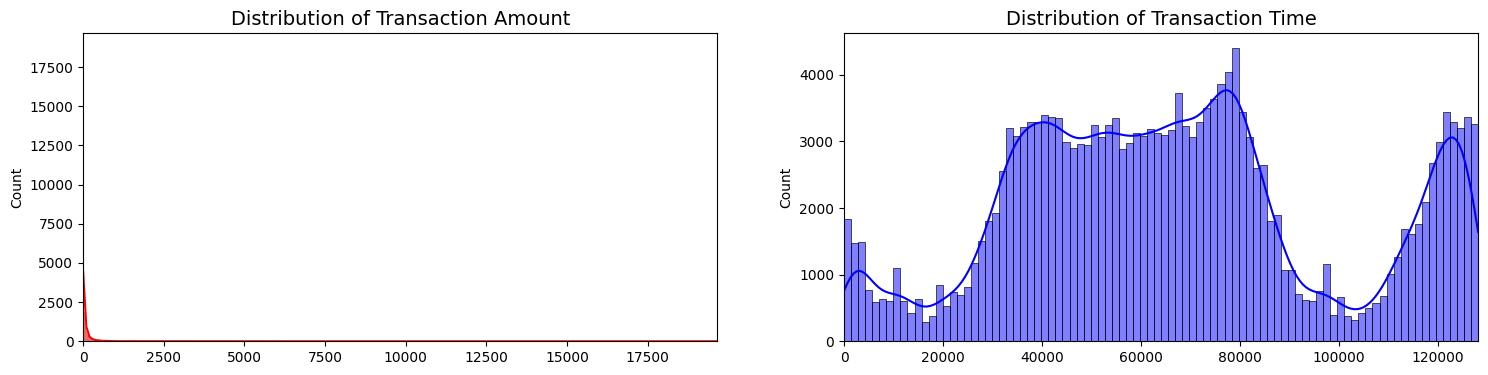

In [26]:
amount_val = df['Amount'].values
time_val = df['Time'].values

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Distribution plot for Transaction Amount
sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution plot for Transaction Time
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Scaling

Standard Scaling: Good for normally distributed data without significant outliers

Robust Scaling: Good fo data with outliers or non-normal distributions 

In [25]:
df_amt_standard_scaled = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df_time_standard_scaled = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df_amt_robust_scaled = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df_time_robust_scaled = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))